In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv('Cars Datasets 2025.csv',encoding='unicode_escape')
df.head()

,Company Names,Cars Names,Engines,CC/Battery Capacity,HorsePower,Total Speed,Performance(0 - 100 )KM/H,Cars Prices,Fuel Types,Seats,Torque
0,FERRARI,SF90 STRADALE,V8,3990 cc,963 hp,340 km/h,2.5 sec,"$1,100,000",plug in hyrbrid,2,800 Nm
1,ROLLS ROYCE,PHANTOM,V12,6749 cc,563 hp,250 km/h,5.3 sec,"$460,000",Petrol,5,900 Nm
2,Ford,KA+,1.2L Petrol,"1,200 cc",70-85 hp,165 km/h,10.5 sec,"$12,000-$15,000",Petrol,5,100 - 140 Nm
3,MERCEDES,GT 63 S,V8,"3,982 cc",630 hp,250 km/h,3.2 sec,"$161,000",Petrol,4,900 Nm
4,AUDI,AUDI R8 Gt,V10,"5,204 cc",602 hp,320 km/h,3.6 sec,"$253,290",Petrol,2,560 Nm


In [3]:
def clean_numeric(val):
    if isinstance(val, str):
        val = val.replace('$', '').replace(',', '').replace('cc', '').replace('km/h', '')
        val = val.replace('hp', '').replace('Nm', '').replace('sec', '').replace('L', '')
        val = val.replace('plug in hyrbrid', '').strip()
        
        if '-' in val:  # handle ranges
            nums = [float(x) for x in val.split('-') if x.strip().replace('.', '', 1).isdigit()]
            return np.mean(nums) if nums else np.nan
        
        try:
            return float(val)
        except:
            return np.nan
    return val

In [4]:
for col in ['CC/Battery Capacity', 'HorsePower', 'Total Speed',
            'Performance(0 - 100 )KM/H', 'Cars Prices', 'Torque','Seats']:
    df[col] = df[col].apply(clean_numeric)
print(df)

     Company Names         Cars Names                             Engines  \
0          FERRARI      SF90 STRADALE                                  V8   
1      ROLLS ROYCE            PHANTOM                                 V12   
2             Ford                KA+                         1.2L Petrol   
3         MERCEDES            GT 63 S                                  V8   
4             AUDI         AUDI R8 Gt                                 V10   
...            ...                ...                                 ...   
1213        Toyota       Crown Signia                      2.5L Hybrid I4   
1214        Toyota  4Runner (6th Gen)  2.4L Turbo I4 (i-FORCE MAX Hybrid)   
1215        Toyota      Corolla Cross              2.0L Gas / 2.0L Hybrid   
1216        Toyota             C-HR+                   1.8L / 2.0L Hybrid   
1217        Toyota     RAV4 (6th Gen)        2.5L Hybrid / Plug-in Hybrid   

      CC/Battery Capacity  HorsePower  Total Speed  Performance(0 - 100 )KM

In [5]:
label_encoders = {}
for col in ['Company Names', 'Cars Names', 'Engines', 'Fuel Types']:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))
    label_encoders[col] = le

In [6]:
df.dropna(inplace=True)

In [7]:
X = df.drop("Fuel Types", axis=1)  # Predict fuel type
y = df["Fuel Types"]


In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
print(X_train.dtypes)
print(X_train.head())


Company Names                  int64
Cars Names                     int64
Engines                        int64
CC/Battery Capacity          float64
HorsePower                   float64
Total Speed                  float64
Performance(0 - 100 )KM/H    float64
Cars Prices                  float64
Seats                        float64
Torque                       float64
dtype: object
      Company Names  Cars Names  Engines  CC/Battery Capacity  HorsePower  \
756               7        1036      270               5300.0       355.0   
585              27         667      202               2894.0       375.0   
739               7         961      281               6600.0       445.0   
1057              9         373      354               7300.0       350.0   
361              35         811        5                999.0        95.0   

      Total Speed  Performance(0 - 100 )KM/H  Cars Prices  Seats  Torque  
756         180.0                        7.6      66700.0    7.0   519.0  
585

In [10]:
model = SVC(kernel='rbf', C=1.0, gamma='scale')
model.fit(X_train, y_train)


,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [11]:
y_pred = model.predict(X_test)

In [12]:
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.7664670658682635


In [13]:
X_vis = df[['HorsePower', 'Total Speed']].values
y_vis = df['Fuel Types'].values


In [14]:
le = LabelEncoder()
y_vis = le.fit_transform(y_vis)

In [15]:
clf = SVC(kernel='rbf', C=1.0, gamma='scale')
clf.fit(X_vis, y_vis)

,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [16]:
x_min, x_max = X_vis[:, 0].min() - 10, X_vis[:, 0].max() + 10
y_min, y_max = X_vis[:, 1].min() - 10, X_vis[:, 1].max() + 10
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.5),
                     np.arange(y_min, y_max, 0.5))

In [17]:
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)


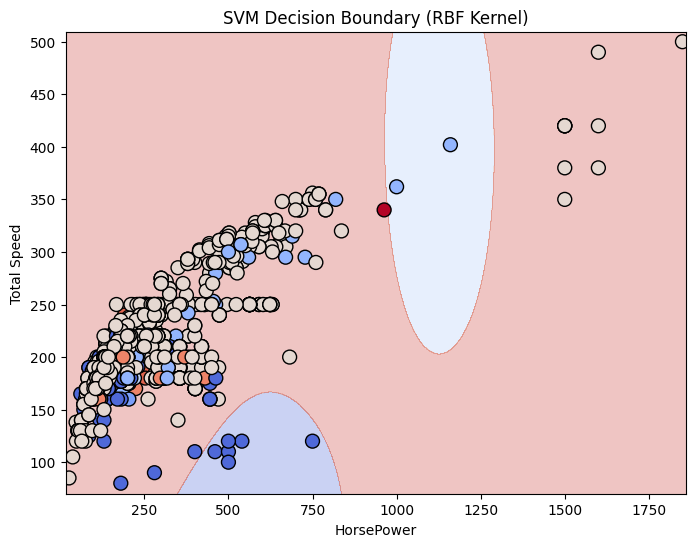

In [18]:
plt.figure(figsize=(8,6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
plt.scatter(X_vis[:, 0], X_vis[:, 1], c=y_vis, edgecolors='k', cmap=plt.cm.coolwarm, s=100)
plt.xlabel('HorsePower')
plt.ylabel('Total Speed')
plt.title('SVM Decision Boundary (RBF Kernel)')
plt.show()

In [19]:
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale')

In [20]:
scores = cross_val_score(svm_model, X, y, cv=5)

c:\Python313\Lib\site-packages\sklearn\model_selection\_split.py:811: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


In [21]:
print("Cross-validation scores:", scores)
print("Mean Accuracy:", scores.mean())
print("Standard Deviation:", scores.std())

Cross-validation scores: [0.79640719 0.79640719 0.79640719 0.77710843 0.80120482]
Mean Accuracy: 0.7935069619796551
Standard Deviation: 0.008407171072469724


In [26]:
le = LabelEncoder()
y_encoded = le.fit_transform(y)

In [22]:
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [0.001, 0.01, 0.1, 1, 'scale', 'auto'],
    'kernel': ['rbf']
}


In [24]:
grid_search = GridSearchCV(
    SVC(),
    param_grid,
    cv=5,          # 5-fold cross-validation
    scoring='accuracy',
    n_jobs=-1
)

In [27]:
grid_search.fit(X, y_encoded)

c:\Python313\Lib\site-packages\sklearn\model_selection\_split.py:811: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


,estimator,SVC()
,param_grid,"{'C': [0.1, 1, ...], 'gamma': [0.001, 0.01, ...], 'kernel': ['rbf']}"
,scoring,'accuracy'
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,C,1


In [28]:
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)

Best Parameters: {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
Best Cross-Validation Accuracy: 0.8031310872231441
